# Directional couplers

Directional couplers are two waveguides with a small gap between them that "couple," or transfer, light from one waveguide to another. The term "coupling" comes from multiple eigenmodes of a waveguide interacting with light, resulting in light being transferred between the modes. Small parts of waveguide modes' electric fields are outside the waveguide, these are called evanescent fields (you can read about them more [here](https://en.wikipedia.org/wiki/Evanescent_field)). When the evanescent field of a waveguide mode overlap with a second waveguide, some of the light is transferred between the modes as the light propagates. This effect can be used to split or combine light in photonic circuits. The amount of light transferred depends on several things:
* coupling length: the length of the region where the waveguides are close enough for their modes to overlap
* phase of the incident light
* coupler gap: the distance between the waveguides
* waveguide geometry and material
* wavelength of the light

<div style="text-align: center;">

![dir_cplr](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dir_cplr.png?raw=true)

</div>

<p style="text-align: center;"> Layout of a directional coupler in gdsfactory </p>

Directional couplers can be designed to produce any ratio of power at the outputs, e.g. 50/50, 75/25, or even a 100/0 split where all the input power in one waveguide is coupled to the other. The fraction of power that is coupled from one waveguide to another is dependent on geometric parameters and can be described as:

$$ \kappa ^2 = \frac {P_{\text{cross}}}{P_0} = \sin^2(CL)$$

Where $\kappa$ is the field coupling, $P_{\text{cross}}$ is the coupled power, $P_0$ is the input power, $C$ is the coupling coefficient, and $L$ is the length of the coupler.

The coupling coefficient is found with supermode analysis.

 

## Supermodes

Just like there are modes that exist in one waveguide, supermodes are modes that exist in multiple waveguides based on the interactions between them. These modes interact with each other and the combination of these interactions determines how light propagates in the specific waveguide system.

An "odd"/antisymmetric, supermode occurs when light in the two waveguides are $180^\circ$ out of phase. Similarly, an even/symmetric, supermode occurs when the light in the two waveguides is in phase.

### Visualizing supermodes

GDSFactory has a function that enables users to find the supermodes in a directional coupler, given the gap and permittivity of the waveguide core and cladding. Use the script below to visualize supermodes and their refractive indices. Change the gap value to see how the refractive indices of the even and odd mode change relative to each other as it increases or decreases. Also, notice how the electric field for an even mode is most intense between the waveguides, while for an odd field, the field is most intense inside of the waveguides.

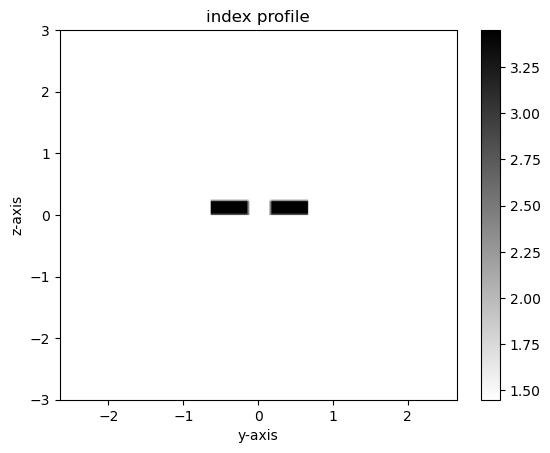

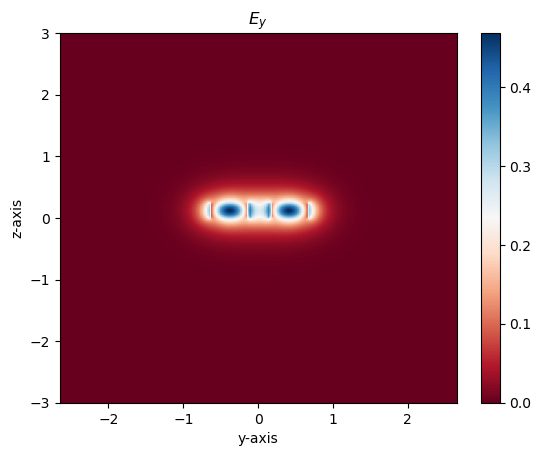

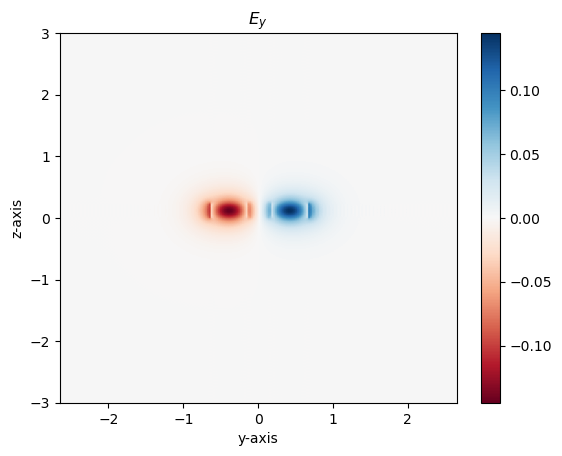

In [27]:
import gplugins.modes as gm
import numpy as np

modes = gm.find_modes_coupler(
    core_widths=(0.5, 0.5),
    gaps=(0.3,), # CHANGE GAP VALUE
    core_material=3.45,
    clad_material=1.45,
    core_thickness=0.22,
    resolution=40,
    sz=6,
    nmodes=2,
)

m1 = modes[1] # even mode
m2 = modes[2] # odd mode

# Look to see how big of a difference there is between the two refractive indices
print("Refractive index of even mode:", m1.neff)
print("Refractive index of odd mode:", m2.neff)

# Plot the dielectric, shows index of refraction values in sidebar
m1.plot_eps()

# Plot the Electric field intensity of the modes
m1.plot_ey()
m2.plot_ey()

## Coupling
The two supermodes that are used to find the coupling coefficient are the first two modes (like we found in the script above), which happen to be an even and odd mode, respectively.

The coupling coefficient to determine the desired coupling length for a directional coupler is found by:

$$
C = \frac{\pi\Delta n}{\lambda}
$$ (coupling_coefficient)

where 

$$
\Delta n = |n_{1} - n_{2}| = |n_{\text{eff,even}} - n_{\text{eff,odd}}|
$$

The effective indices of the even and odd modes depend on
* the coupler gap
* the wavelength of light
* the waveguide geometry and material

### Coupling length and the gap between waveguides

There is a function, `find_coupling_vs_gap`, in gdsfactory that allows you to find the coupling length (or crossover length) given the gap. It outputs a table detailing the gap width, even and odd mode refractive indices (ne and no, respectively), the coupling length in units of $\mu m$ (lc), and the difference between ne and no, $\Delta n$ (dn). 

From the table, you should also be able to see that there is an exponential relationship between the gap and the coupling:

$$C = B\cdot e^{-A \cdot g}$$

$A$ and $B$ are dependent on various parameters of the directional coupler, such as the geometry and the wavelength at which it is being operated.

In [28]:
import meep as mp
gm.find_coupling_vs_gap(gap1=0.1,
                        gap2=0.2,
                        steps=11,
                        nmodes=1,
                        wavelength=1.55,
                        parity=mp.EVEN_Y,
                        core_widths=(0.5, 0.5),
                        core_material=3.45,
                        clad_material=1.45,
                        core_thickness=0.22,
                        resolution=40,
                        sz=6,)

  0%|          | 0/11 [00:00<?, ?it/s]

,gap,ne,no,lc,dn
0,0.10,2.463631,2.409798,14.396530,0.053832
1,0.11,2.460647,2.410682,15.510925,0.049965
2,0.12,2.459734,2.411797,16.166968,0.047937
3,0.13,2.452682,2.411449,18.795515,0.041233
4,0.14,2.448745,2.412270,21.247526,0.036475
5,0.15,2.447691,2.414688,23.482841,0.033003
6,0.16,2.447658,2.416929,25.220085,0.030729
7,0.17,2.447685,2.418000,26.107513,0.029685
8,0.18,2.442283,2.416295,29.821729,0.025988
9,0.19,2.439496,2.416231,33.311196,0.023265


As seen above, each supermode has its own effective index ($n_{\text{eff,even}}$, $n_{\text{eff,odd}}$) that differs from that of the normal mode in the waveguide and is dependent of the gap between the waveguides. $n_{\text{eff,even}}$ increases as the gap decreases, and $n_{\text{eff,odd}}$ decreases as the gap decreases. The different effective indices also mean that the two modes have different propagation constants.

The propagation constant is

$$
\beta = \frac{2 \pi n_{\text{eff}}}{\lambda}
$$

Because of this difference in propagation constants, the modes travel at different speeds down the waveguide and so the field intensity oscillates between the two waveguides. This is called beating. One beat is equivalent to the coupling length, or cross-over length, and it is the length it takes for all of the power from one waveguide to be coupled into the other. As the gap between the waveguides gets smaller, the beating gets faster since $\Delta n$ gets larger, making the cross-over length shorter.

This cross-over length $L$, that gives 100% power transfer is found with:

\begin{align}
L_{\text{cross-over}} = \frac {\lambda}{2\Delta n} \nonumber
\end{align}

This is found from determining what length when multiplied by the propagation constants makes the phase difference $\pi$:

$$
\beta _1 L_x - \beta _2 L_x = \pi
$$

$$
L_x \left[\frac{2 \pi n_1}{\lambda} - \frac{2 \pi n_2}{\lambda}\right]  = \pi
$$

### Other splitting ratios

Of course, there are many applications for directional couplers that don't require a complete transfer of power from one waveguide to another. Oftentimes a different splitting ratio is desired, such as a 50/50 or 60/40 ratio. In such cases, you can find the power that one waveguide receives from the other with the equation:

$$
P_{\text{cross}}(L) = P_{\text{initial}}\sin^2 \left( \frac{\pi\Delta n}{\lambda}L \right)
$$

## Simulation to show coupling across a DC

To further explore how electric field intensity oscillates between two waveguides close together, we simulate the coupling process in meep. We send light into one of the waveguides and plot the electric field intensity over time in the waveguides. We recommend changing the gap width in the script and seeing how it affects the cross-over length. The simulation may take a couple minutes to run depending on the waveguide lengths. The plot of the simulation setup and the output GIF showing the field intensities is shown below. This gap is much smaller than is typically used in practice so the cross-over length is shorter so the simulation runs faster.

<Axes: xlabel='X', ylabel='Y'>

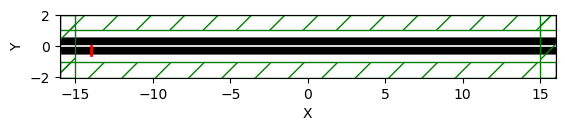

In [29]:
import meep as mp

# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define wavelength in um
wvl = 1.55


# # Define cell and geometric parameters
resolution = 20
wg_width = 0.5
dpml = 1
pad = 0.5

## CHANGE GAP DISTANCE ##
gap = 0.07
## CHANGE WAVEGUIDE LENGTH ##
Lx = 30

Sx = dpml + Lx + dpml
Sy = dpml + pad + wg_width + gap + wg_width + pad + dpml
wg_center_y = gap/2 + wg_width/2

# Add PML (perfectly matched layers)
pml = [mp.PML(dpml)]

# Create 2 infinitely long parallel waveguides
geometry = [mp.Block(size=mp.Vector3(Sx,Sy, 0), center=mp.Vector3(), material=SiO2),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, wg_center_y, 0), material=Si),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, -wg_center_y, 0), material=Si),
            ]

# Put a pulse Eigenmode source at beginning of one waveguide
fcen = 1 / wvl
width = 0.1
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0,0),
        size=mp.Vector3(0,gap+wg_width),
        center=mp.Vector3(-Sx/2+dpml+1, -wg_center_y))
        ]

# Simulation object
sim = mp.Simulation(
    cell_size=mp.Vector3(Sx, Sy),
    boundary_layers=pml,
    geometry=geometry,
    sources=source,
    default_material=SiO2,
    resolution=resolution,
)

# Show simulation set-up
sim.plot2D()

In [30]:
from PIL import Image
import glob
import os

sim.reset_meep()
# Capture electric field intensity over time and output into a gif
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(2, mp.output_efield_z)),
        until=200)

# Generate pngs from the simulation output
# This line assumes that colormaps are working, 
# you are in the same directory as the output files, 
# and that h5py is installed
# If you have a problem with h5utils, see note below
os.system("h5topng -t 0:99 -R -Zc RdBu -A eps-000000.00.h5 -a gray ez.h5")

# Create a gif from the pngs
frames = []
imgs = glob.glob("ez.t*")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('ez.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               loop=0)

# Clean up workspace by deleting all generated images
for i in imgs: 
    os.remove(i)
for f in glob.glob("*.h5"):
    os.remove(f)

FloatProgress(value=0.0, description='0% done ', max=200.0)

**Note on h5utils:**
Sometimes the colormaps in h5utils are invalid when used with Meep. To circumvent this issue, specify the path to your desired colormap using:

`(path to h5utils)/h5utils/share/h5utils/colormaps/(desired colormap)`

Image of the simulation set-up:

<div style="text-align: center;">

![set-up](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dircplr_sim_setup.png?raw=true)

</div>

Gif from the meep simulation with a gap of $0.2 \mu m$:

<div style="text-align: center;">

![gif](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dircplr_ez.gif?raw=true)

</div>

## Design considerations

When designing a directional coupler, the length and gap must be chosen to produce the desired power splitting ratio at the output. Directional couplers are also sensitive to fabrication variations, so the length and gap should be chosen to be robust to these variations.

Another element to consider is that the principles behind directional coupling can interfere with nearby circuit components on the chip. Parasitic coupling occurs when two waveguides that are not part of a directional coupler are placed too close to each other, leading to power "leaking" between them. Waveguides and components should be placed far enough away so this does not happen.

## Exercises

How far apart should two $0.5\mu m$ x $0.22 \mu m$ silicon waveguides be to have a coupling length of $20 \mu m$?
<details>
    <summary>Answer</summary>
    Approximately 0.135 microns. 
</details>

## Sources

"Silicon Photonics Design" by Lukas Chrostowski

"Photonic Components: Directional Coupler" by Stefan Preble